In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests

In [3]:
wiki =  requests.get("https://en.wikipedia.org/wiki/Japan")

In [4]:
import bs4

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(wiki.content, "lxml")

In [7]:
soup = soup.getText(strip=True) #scrapping the content

In [8]:
japan = soup

In [9]:
import re

In [10]:
japan = re.sub(r'\[\d+\]',"",japan)

In [11]:
japan = re.sub(r'\[\w+\]',"",japan)

In [12]:
japan = re.sub('[0-9]+',"", japan)

In [13]:
#japan

In [14]:
import nltk

In [15]:
from nltk.tokenize import sent_tokenize

In [16]:
sentences = sent_tokenize(japan)

In [17]:
from textblob import TextBlob

In [18]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    else:
        return "Negaive"

In [19]:
sentences = pd.DataFrame(sentences)

In [20]:
sentences.columns = ["sentences"]

In [21]:
sentences["sentiment"] = [str(analyze_sentiment(x)) for x in sentences.sentences]

In [22]:
sentences.sentiment.value_counts()

Negaive     724
Positive    122
Name: sentiment, dtype: int64

# Tokenizing into words

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
japanwords = word_tokenize(japan)

In [25]:
# filtering out all "non-alphanumeric words" from the list of words and returning only the "alphanumeric words" in a new list
japanwords = [word for word in japanwords if word.isalnum() ]

# Stop Words

In [26]:
from nltk.corpus import stopwords

In [27]:
stop_words = set(stopwords.words("english"))

In [28]:
japanwords = [word for word in japanwords if not str.lower(word) in stop_words]

In [29]:
len(japanwords)

8040

### customizing stopwords

In [53]:
with open("StopWords_Auditor.txt") as my_txt:
    a = my_txt.read().lower().split()
    uni_a = set(a)

In [54]:
with open("StopWords_Currencies.txt") as my_txt:
    b = my_txt.read().lower().split()
    uni_b = set(b)

In [55]:
with open("StopWords_DatesandNumbers.txt") as my_txt:
    c = my_txt.read().lower().split()
    uni_c = set(c)

In [56]:
with open("StopWords_Generic.txt") as my_txt:
    d = my_txt.read().lower().split()
    uni_d = set(d)

In [57]:
with open("StopWords_GenericLong.txt") as my_txt:
    e = my_txt.read().lower().split()
    uni_e = set(e)

In [58]:
with open("StopWords_Geographic.txt") as my_txt:
    f = my_txt.read().lower().split()
    uni_f = set(f)

In [59]:
with open("StopWords_Names.txt") as my_txt:
    g = my_txt.read().lower().split()
    uni_g = set(g)

In [60]:
all_uni_words = set()

In [71]:
all_uni_words.update(uni_g)

In [72]:
len(all_uni_words)

12840

In [76]:
full_vocab = dict()
i = 0

for word in all_uni_words:
    full_vocab[word] = i
    i += 1

In [78]:
#full_vocab

In [79]:
# converting the dictionary to list
all_stop_words = [""] * len(full_vocab)

In [80]:
for word in full_vocab:
    word_index = full_vocab[word]
    all_stop_words[word_index] += word

In [82]:
len(all_stop_words)

12840

***finally using customized stop-words***

In [83]:
custom_stop_words = all_stop_words

In [84]:
stop_words.update(custom_stop_words)

In [85]:
japanwords = [word for word in japanwords if not str.lower(word) in stop_words]

# Lets see what are the frequent words

In [86]:
from nltk.probability import FreqDist

In [87]:
word_freq = FreqDist(japanwords)

In [88]:
word_freq

FreqDist({'World': 52, 'world': 40, 'History': 32, 'University': 29, 'originalon': 25, 'Asian': 24, 'population': 23, 'period': 23, 'War': 20, 'century': 16, ...})

Here, we can see lots of frequents words which serves no purpose to our analysis.

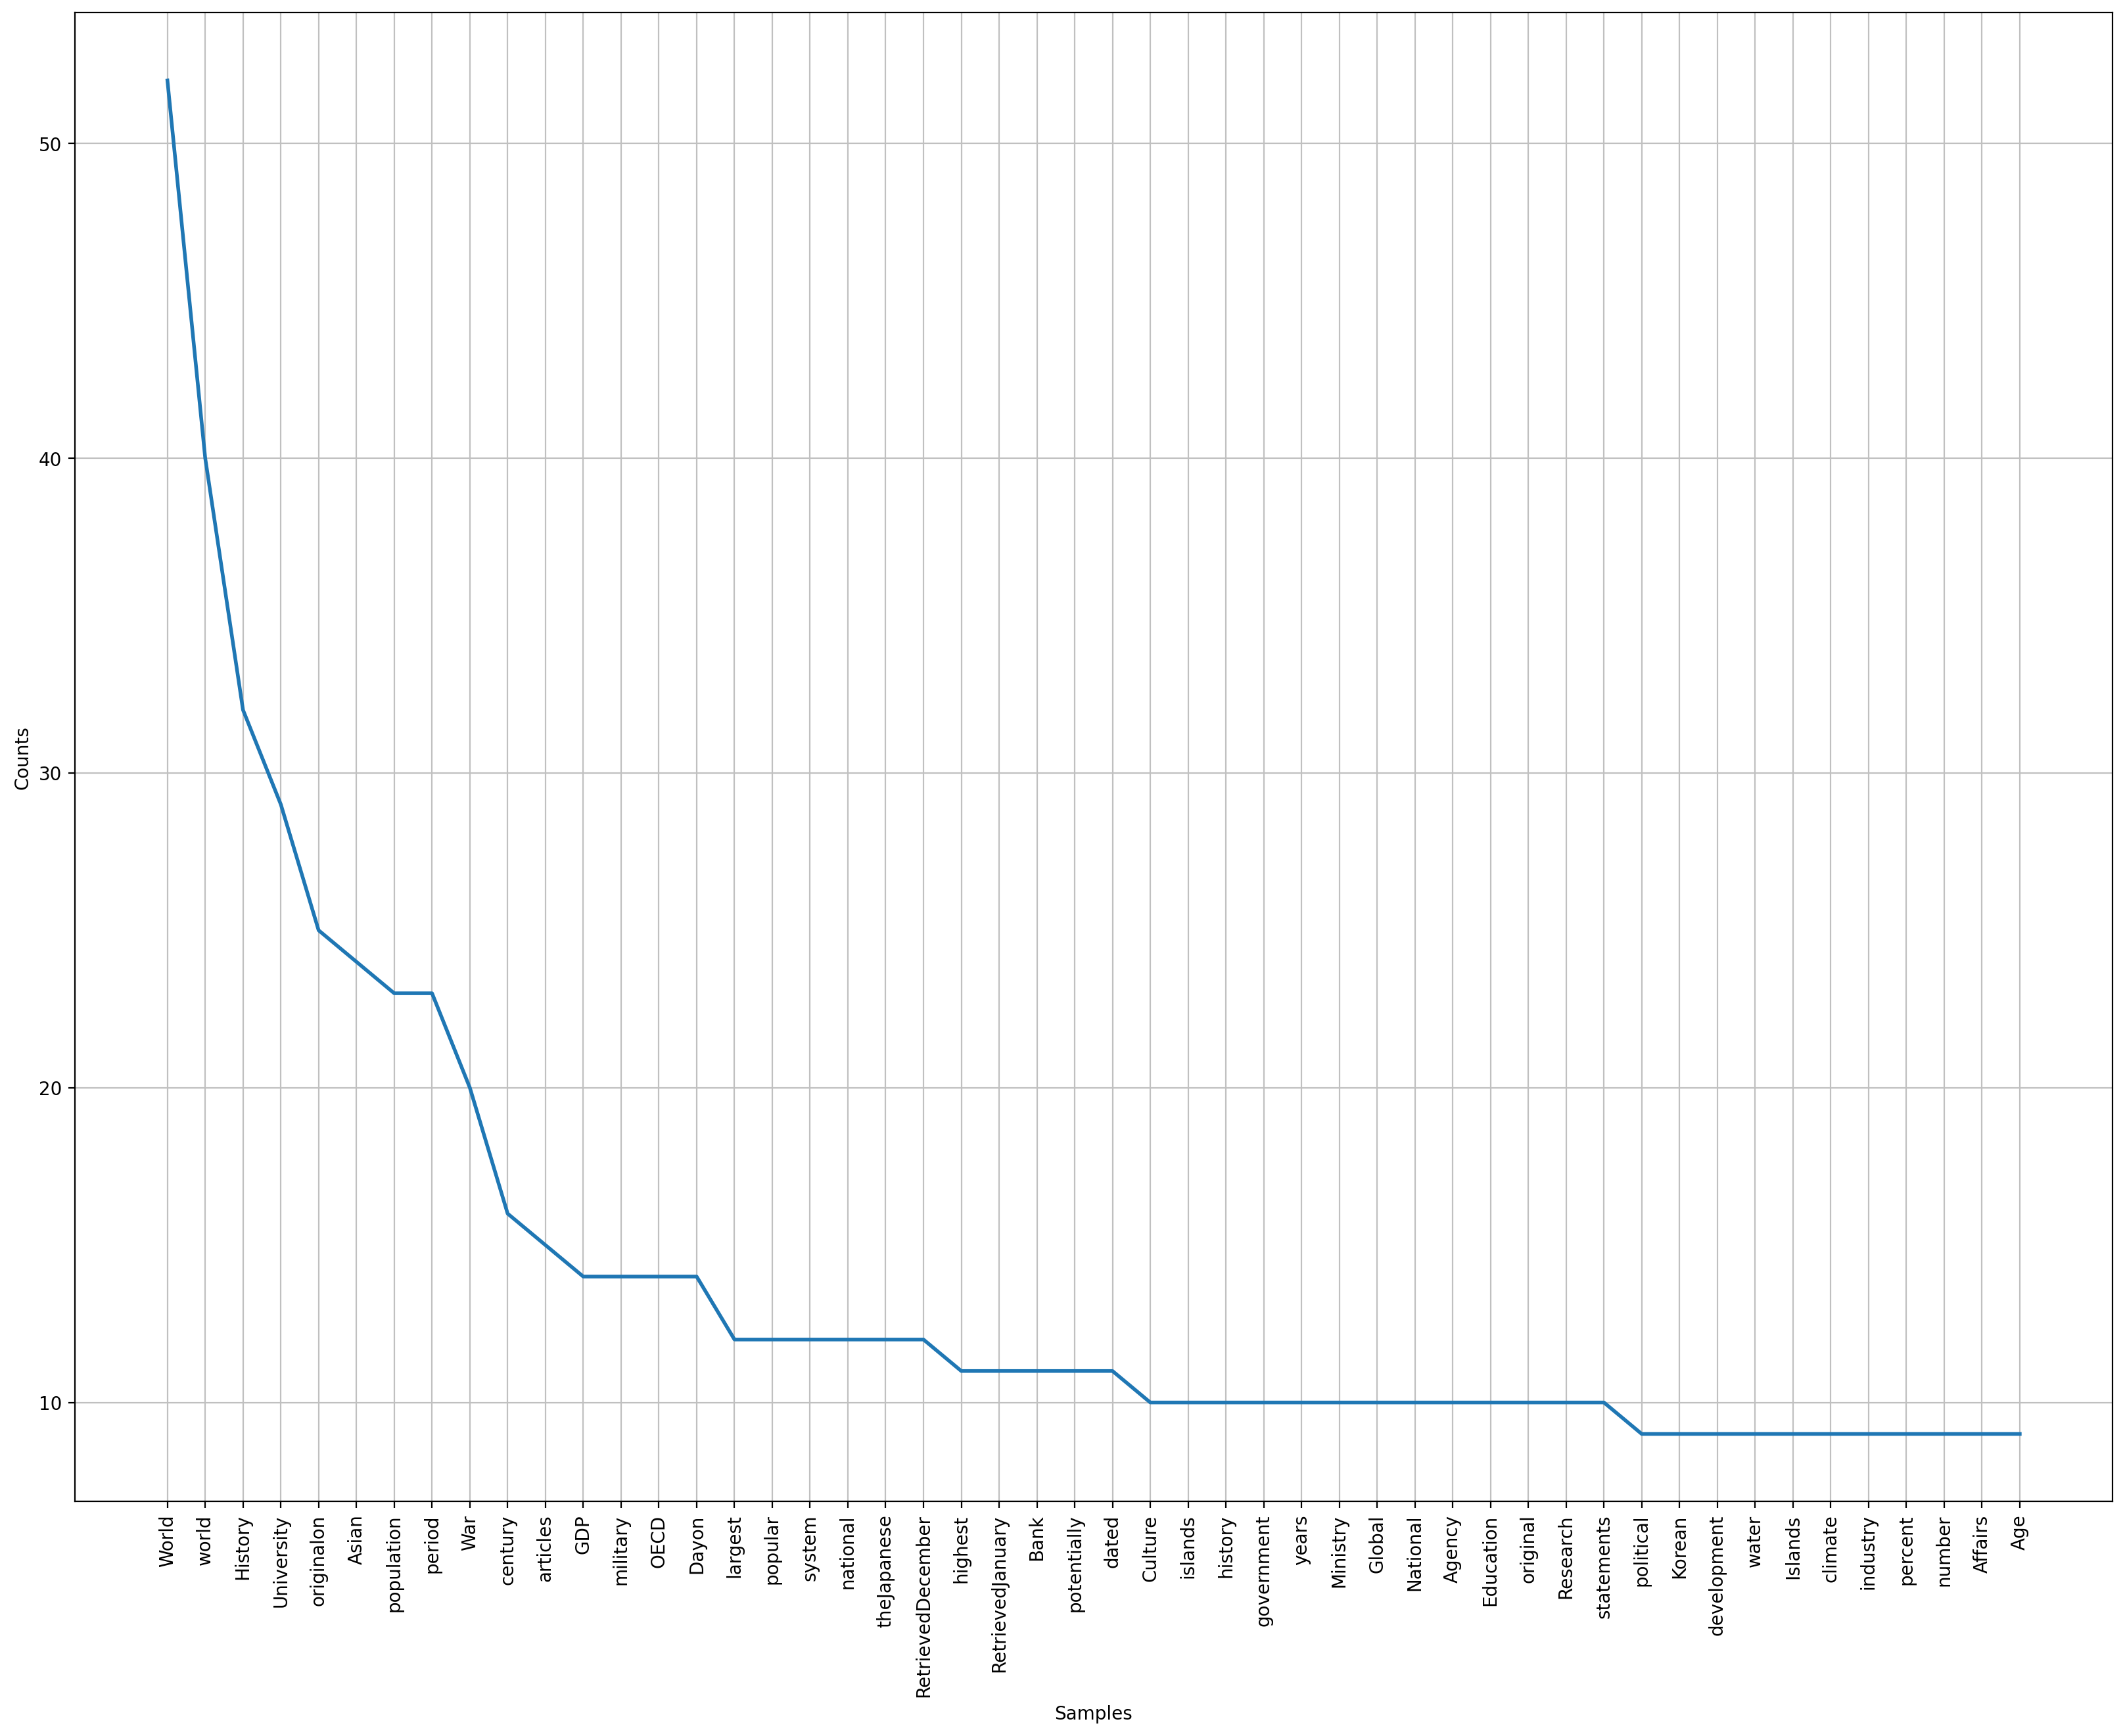

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [89]:
plt.figure( figsize=(20,15), dpi = 200)

word_freq.plot(50, cumulative=False)


So, Lets remove these words which are not required for our analysis.

In [97]:
japanwords = [w for w in japanwords if not w in ["pp","PDF","Archived", "fromthe", "RetrievedNovember", "th", "May", "Press", "April", "among",
                                                "identifiersArticles", "article","June", "one", "September", "total", "February", "March", "originalon", "period"]]

# Plotting the Word-Cloud

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [98]:
from wordcloud import WordCloud

In [99]:
japan_words = (" ").join(japanwords)

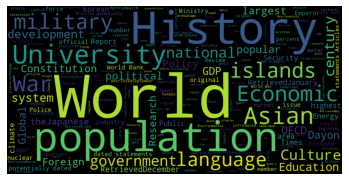

In [100]:
wordcloud = WordCloud(width=1000, height= 500).generate(japan_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()